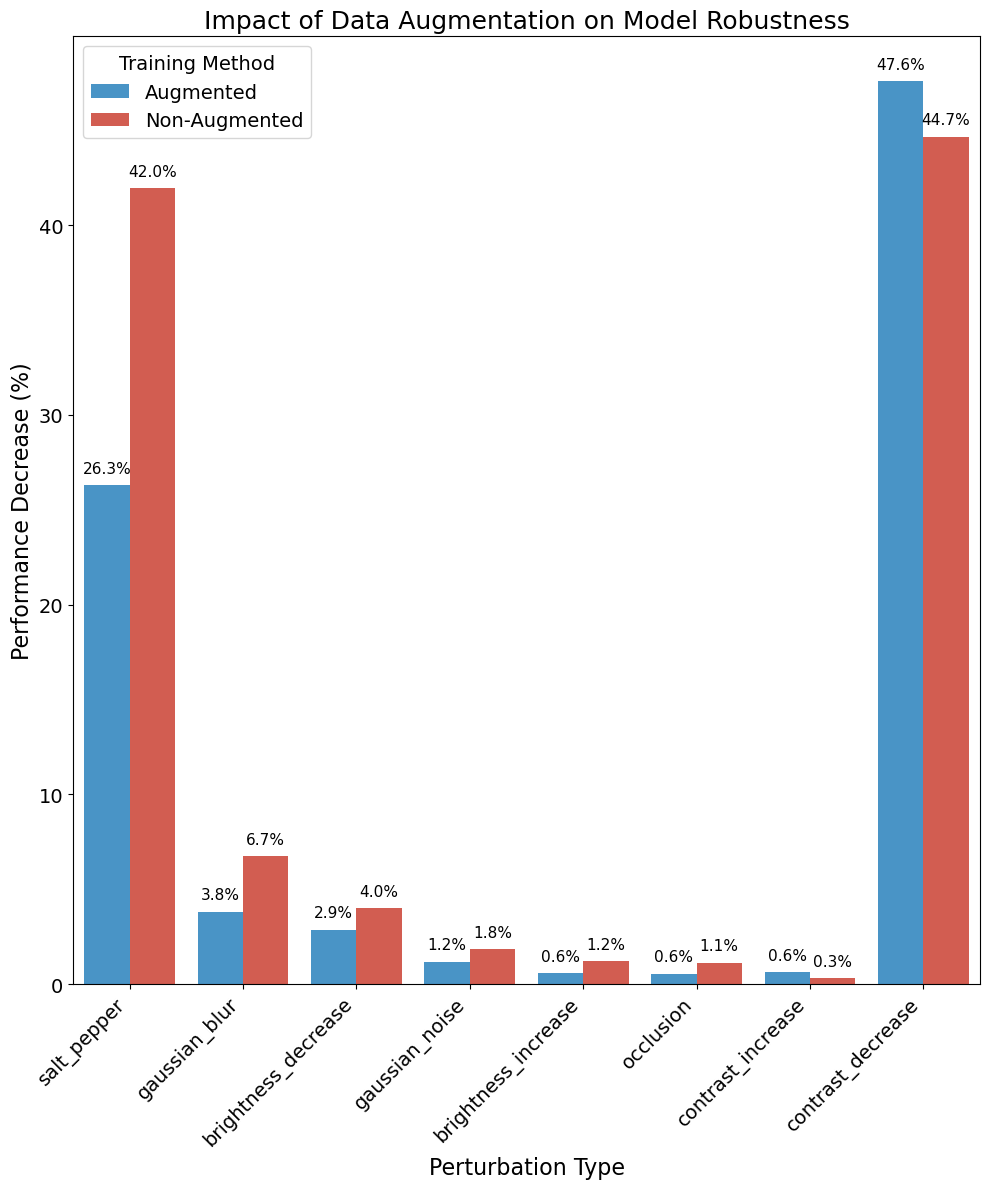

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load both sets of results
aug_results = np.load('D:/Emma/cv-project/robustness_results_augmented_data/perturbation_results.npy', allow_pickle=True).item()
unaug_results = np.load('D:/Emma/cv-project/robustness_results_unagumented_data/perturbation_results.npy', allow_pickle=True).item()

# Get the list of perturbation types
perturbation_types = list(aug_results.keys())

# Calculate performance decrease for each perturbation types
performance_decrease_aug = []
performance_decrease_unaug = []
for pert_type in perturbation_types:
    # Get the initial and final dice scores
    initial_aug = aug_results[pert_type][0]  # First level (no perturbation)
    final_aug = aug_results[pert_type][-1]   # Last level (max perturbation)
    
    initial_unaug = unaug_results[pert_type][0]
    final_unaug = unaug_results[pert_type][-1]
    
    # Calculate percentage decrease
    decrease_aug = ((initial_aug - final_aug) / initial_aug) * 100
    decrease_unaug = ((initial_unaug - final_unaug) / initial_unaug) * 100
    
    performance_decrease_aug.append(decrease_aug)
    performance_decrease_unaug.append(decrease_unaug)

# Create a DataFrame for easier plotting
data = {
    'Perturbation Type': perturbation_types * 2,
    'Model Type': ['Augmented'] * len(perturbation_types) + ['Non-Augmented'] * len(perturbation_types),
    'Performance Decrease (%)': performance_decrease_aug + performance_decrease_unaug
}
df = pd.DataFrame(data)

# Sort by average percentage decrease (combining both augmented and non-augmented)
avg_decrease = {}
for pert_type in perturbation_types:
    aug_value = df[(df['Perturbation Type'] == pert_type) & (df['Model Type'] == 'Augmented')]['Performance Decrease (%)'].values[0]
    unaug_value = df[(df['Perturbation Type'] == pert_type) & (df['Model Type'] == 'Non-Augmented')]['Performance Decrease (%)'].values[0]
    avg_decrease[pert_type] = (aug_value + unaug_value) / 2

# Sort perturbation types by average percentage decrease
sorted_types = sorted(perturbation_types, key=lambda x: avg_decrease[x], reverse=True)

# Create a categorical type with the sorted order
df['Perturbation Type'] = pd.Categorical(df['Perturbation Type'], categories=sorted_types, ordered=True)
df = df.sort_values('Perturbation Type')

# Create the plot - VERTICAL BAR CHART
plt.figure(figsize=(14, 10))  # Adjusted figure size for vertical orientation
bar_plot = sns.barplot(
    x='Perturbation Type',  # x-axis is perturbation type
    y='Performance Decrease (%)',  # y-axis is performance decrease
    hue='Model Type', 
    data=df,
    palette=['#3498db', '#e74c3c']
)

# Increase tick label size
plt.xticks(fontsize=14, rotation=45, ha='right')  # Larger x-tick labels with rotation
plt.yticks(fontsize=14)  # Larger y-tick labels

# Add percentages on the bars
for i, bar in enumerate(bar_plot.patches):
    height = bar.get_height()
    # Skip very small values or zeros
    if height < 0.1:  
        continue
    plt.text(
        bar.get_x() + bar.get_width()/2,  
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=11  # Increased font size for percentages
    )

# Add a title and labels with larger font sizes
plt.title('Impact of Data Augmentation on Model Robustness', fontsize=18)
plt.xlabel('Perturbation Type', fontsize=16)
plt.ylabel('Performance Decrease (%)', fontsize=16)
plt.legend(title='Training Method', fontsize=14, title_fontsize=14)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Save the figure
plt.savefig('augmentation_robustness_comparison_vertical.png', dpi=300, bbox_inches='tight')
plt.show()